# Regression on Ames Housing Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

* 加载数据

In [3]:
df = pd.read_excel("AmesHousing.xls")
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
df.shape

(2930, 82)

In [12]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

* visualize distribution of each continous variables and targets

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000ECCFF98>,
      dtype=object)

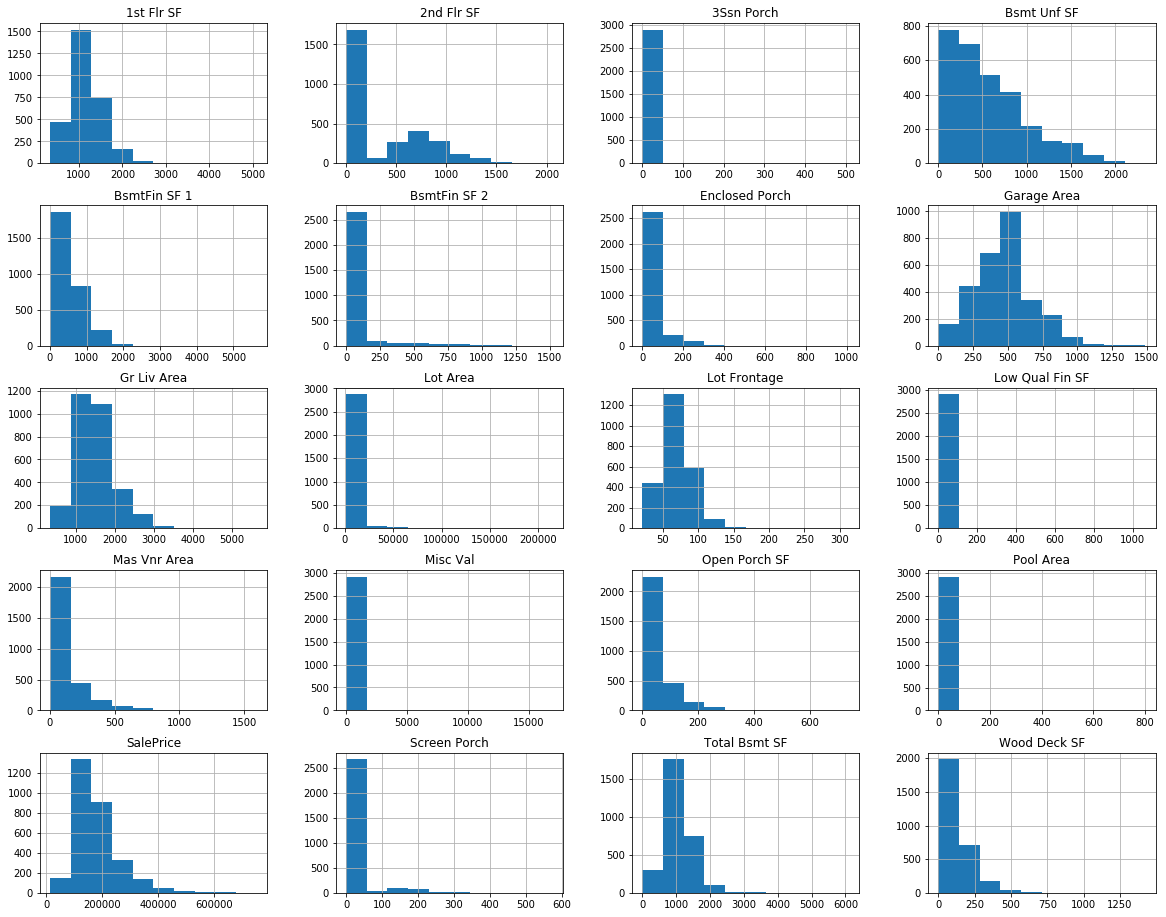

In [25]:
continuous_variables = ['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1',
               'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
               '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area',
               'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch','3Ssn Porch',
               'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice']
df.hist(column=continuous_variables, figsize=(20,16))

* visualize the dependency of the target of each continuous feature

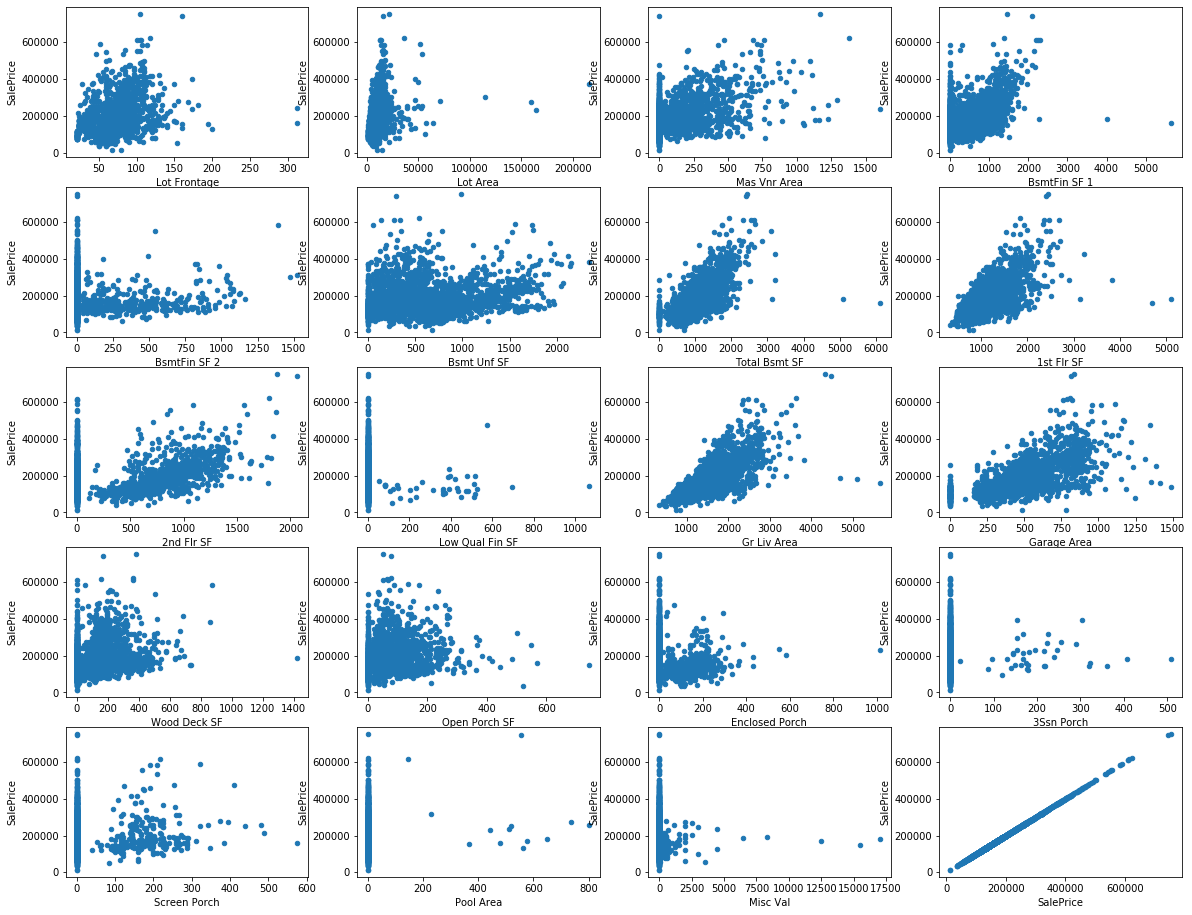

In [36]:
fig, axes = plt.subplots(5,4, figsize=(20,16))
for i,variables in enumerate(continuous_variables):
    for j, variable in enumerate(variables):
        df.plot(variable, 'SalePrice', kind='scatter', ax=axes[i, j])

In [37]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1])

In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2197, 81), (733, 81), (2197,), (733,))

In [82]:
categorical_variables = ['MS SubClass', 'MS Zoning', 'Street', 'Alley',
                        'Land Contour', 'Lot Config', 'Neighborhood',
                        'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
                        'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
                        'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air',
                        'Garage Type', 'Misc Feature', 'Sale Type', 'Sale Condition']
len(categorical_variables)

23

In [83]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
#from sklearn.metrics import r2_score

In [120]:
r2_scores = []
contivars = continuous_variables.ravel()[:-1]
for category in categorical_variables:
    X_train2 = pd.concat([X_train[contivars], pd.get_dummies(X_train[category], dummy_na=True)], axis=1)
    #score = pd.DataFrame(cross_validate(LinearRegression(), pd.get_dummies(X_train, columns=[category]), y_train, cv=10,scoring=['r2']))
    score = pd.DataFrame(cross_validate(LinearRegression(), X_train2, y_train, cv=10,scoring=['r2']))
    r2_scores.append(score['test_r2'].mean())
print(r2_scores)
print(np.max(r2_scores), categorical_variables[np.argmax(r2_scores)])

F:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [139]:
pd.get_dummies(X_train['Alley'], dummy_na=True)
r2_scores = []
contivars = continuous_variables.ravel()[:-1]
X_train2 = pd.concat([X_train[contivars], pd.get_dummies(X_train[categorical_variables], prefix='xxx', dummy_na=True)], axis=1)
X_train2.fillna(method='backfill')
cross_validate(LinearRegression(), X_train2, y_train, cv=10,scoring=['r2'])

F:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [138]:
df.fillna(method='backfill')

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,Pave,IR1,Lvl,...,0,Ex,MnPrv,Gar2,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Pave,Reg,Lvl,...,0,Ex,MnPrv,Gar2,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,Pave,IR1,Lvl,...,0,Ex,MnPrv,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Pave,Reg,Lvl,...,0,Ex,MnPrv,Shed,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,Pave,IR1,Lvl,...,0,Ex,MnPrv,Shed,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,Pave,IR1,Lvl,...,0,Ex,GdPrv,Shed,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,Pave,Reg,Lvl,...,0,Ex,GdPrv,Shed,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,Pave,IR1,HLS,...,0,Ex,GdPrv,Shed,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,Pave,IR1,Lvl,...,0,Ex,GdPrv,Shed,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,Pave,Reg,Lvl,...,0,Ex,GdPrv,Shed,0,6,2010,WD,Normal,189000


In [133]:
df.shape

(2930, 82)

In [134]:
df['Alley'].

(2930,)